<a href="https://colab.research.google.com/github/WilliamAshbee/DataminingAssignments/blob/main/figure8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

max min x tensor(30.4550) tensor(1.5572)
max min y tensor(29.0276) tensor(2.8884)


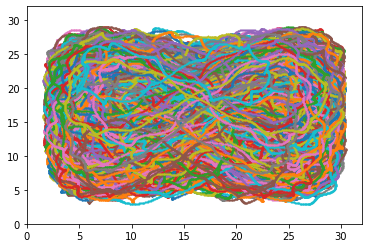

In [2]:
length = 1000
numpoints = 1000
x = torch.zeros(length,numpoints)
y = torch.zeros(length,numpoints)
for i in range(1000):
  t = torch.linspace(0,2*3.14159,1000)
  x[i,:] = t.cos()
  y[i,:] = t.sin()*t.cos()

  WIDTH = 14
  randMultx = np.random.uniform(8.0,WIDTH-.1)
  randMulty = np.random.uniform(8.0,WIDTH-.1)

  maxaddx = WIDTH-randMultx
  maxaddy = 3.0+WIDTH-randMulty
  
  assert maxaddx >0
  assert maxaddy >0

  randAddx = np.random.uniform(-maxaddx,maxaddx)
  randAddy = np.random.uniform(-maxaddy,maxaddy)

  randMultSinx = np.random.uniform(.25,.5)
  randMultSiny = np.random.uniform(.25,.5)
  randMultFreqSinx = np.random.uniform(10.0,20.0)
  randMultFreqSiny = np.random.uniform(10.0,20.0)
  #randAddSinx = np.random.uniform(0.0,1.0)
  #randAddSiny = np.random.uniform(0.0,1.0)
  xsin = randMultSiny*((t*randMultFreqSinx).sin())#+randAddSinx
  ysin = randMultSiny*((t*randMultFreqSiny).sin())#+randAddSiny
  #print('maxxsin',torch.max(xsin))
  x[i,:] = (x[i,:]*randMultx)+16+randAddx+xsin
  y[i,:] = (y[i,:]*randMulty)+16+randAddy+ysin
  
  plt.scatter(x[i,:],y[i,:],s=1)
  plt.xlim(0,32)
  plt.ylim(0,32)
  #plt.show()
  
print("max min x",torch.max(x),torch.min(x))
print("max min y",torch.max(y),torch.min(y))
assert torch.max(x).item() < 32
assert torch.min(x).item() > 0
assert torch.max(y).item() < 32
assert torch.min(y).item() > 0

plt.show()

max min x tensor(30.3143) tensor(1.5850)
max min y tensor(29.4297) tensor(3.2315)


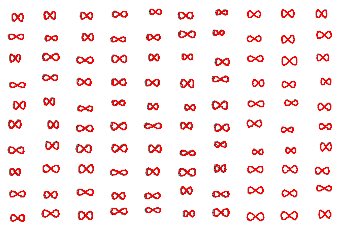

In [3]:
#add donut here
import torch
import numpy as np
import pylab as plt
from skimage import filters
import math

global numpoints
numpoints = 1000
side = 32

rows = torch.zeros(32,32)
columns = torch.zeros(32,32)


for i in range(32):
    columns[:,i] = i
    rows[i,:] = i


def donut_matrix(length = 10):
    
    canvas = torch.zeros((length,side, side))
    x = torch.zeros((length,numpoints))
    y = torch.zeros((length,numpoints))
        
    ###

    for i in range(length):
      t = torch.linspace(0,2*3.14159,numpoints)
      x[i,:] = t.cos()
      y[i,:] = t.sin()*t.cos()

      WIDTH = 14
      randMultx = np.random.uniform(8.0,WIDTH-.1)
      randMulty = np.random.uniform(8.0,WIDTH-.1)

      maxaddx = WIDTH-randMultx
      maxaddy = 3.0+WIDTH-randMulty
      
      assert maxaddx >0
      assert maxaddy >0

      randAddx = np.random.uniform(-maxaddx,maxaddx)
      randAddy = np.random.uniform(-maxaddy,maxaddy)

      randMultSinx = np.random.uniform(.25,.5)
      randMultSiny = np.random.uniform(.25,.5)
      randMultFreqSinx = np.random.uniform(10.0,20.0)
      randMultFreqSiny = np.random.uniform(10.0,20.0)
      #randAddSinx = np.random.uniform(0.0,1.0)
      #randAddSiny = np.random.uniform(0.0,1.0)
      xsin = randMultSiny*((t*randMultFreqSinx).sin())#+randAddSinx
      ysin = randMultSiny*((t*randMultFreqSiny).sin())#+randAddSiny
      #print('maxxsin',torch.max(xsin))
      x[i,:] = (x[i,:]*randMultx)+16+randAddx+xsin
      y[i,:] = (y[i,:]*randMulty)+16+randAddy+ysin
  
    assert torch.max(x).item() < 32
    assert torch.min(x).item() > 0
    assert torch.max(y).item() < 32
    assert torch.min(y).item() > 0
    
    print("max min x",torch.max(x),torch.min(x))
    print("max min y",torch.max(y),torch.min(y))
    ###
    
    assert x.shape == (length,numpoints)
    assert y.shape == (length,numpoints)
    assert torch.sum(x[x>(side-1)])==0 
    assert torch.sum(x[x<0])==0 
    assert torch.sum(y[y>(side-1)])==0 
    assert torch.sum(y[y<0])==0 
    
    points = torch.zeros(length,numpoints,2)
    for l in range(length):
        canvas[l,y[l,:].type(torch.LongTensor),x[l,:].type(torch.LongTensor)]=1.0
        points[l,:,0] = x[l,:]#modified for lstm discriminator
        points[l,:,1] = y[l,:]#modified for lstm discriminator 
    
    
    return {
        'canvas': canvas, 
        'points':points.type(torch.FloatTensor)}


def plot_all( sample = None, model = None, labels = None):
    img = sample[:,:].squeeze().cpu().numpy()
    plt.imshow(img, cmap=plt.cm.gray_r)
    if model != None:
        with torch.no_grad():
            global numpoints

            sample = torch.stack([sample for i in range(64)],dim = 0).cuda()
            pred = model(sample,torch.zeros(64,1000,2).cuda())#come back to this
            predres = numpoints
            X = pred[0,:,0]
            Y = pred[0,:,1]
            
            s = [.0001 for x in range(predres)]
            
            assert len(s) == predres
            c = ['red' for x in range(predres)]
            assert len(c) == predres
            Y = Y.cuda()
            X = X.cuda()
            plt.plot(X.cpu(),Y.cpu(),',-',c='red', ms=.1, lw=0.1) 

    else:
        X = labels[:,0]
        Y = labels[:,1]
        s = [.0001 for x in range(numpoints)]
        c = ['red' for x in range(numpoints)]
        plt.plot(X.cpu(),Y.cpu(),',-',c='red',  ms=.1, lw=0.1) 


class DonutDataset(torch.utils.data.Dataset):
    def __init__(self, length = 10):
        self.length = length
        self.values = donut_matrix(length)
        assert self.values['canvas'].shape[0] == self.length
        assert self.values['points'].shape[0] == self.length
        
        count = 0
        for i in range(self.length):
          a = self[i]
          c = a[0]
          for el in a[1]:
            y,x = (int)(el[1]),(int)(el[0])
            if x < side-2 and x > 2 and y < side-2 and y > 2: 
              if c[y,x] != 1 and \
                c[y+1,x] != 1 and c[y+1,-1+x] != 1 and c[y+1,1+x] != 1 and \
                c[y-1,x] != 1 and c[y,-1+x] != 1 and c[y,1+x] != 1:
                count+=1
        assert count ==0


    def __len__(self):
        return self.length


    def __getitem__(self, idx):
        canvas = self.values["canvas"]
        canvas = canvas[idx,:,:]
        assert canvas.shape == (side,side)
        points = self.values["points"]
        points = points[idx,:]
        z = torch.zeros(numpoints,1)
        points = torch.cat([points,z], dim = 1)
        
        return canvas, points
    
    @staticmethod
    def displayCanvas(title,dataset, model):
        for i in range(100):
            sample, labels = dataset[i]
            plt.subplot(10,10,i+1)
            plot_all(sample = sample,model=model, labels = labels)
            plt.axis('off')
        plt.savefig(title,dpi=1200)
        
dataset = DonutDataset(length = 100)

DonutDataset.displayCanvas('donut.png',dataset, model = None)

In [4]:
#https://math.stackexchange.com/questions/7988/the-function-that-draws-a-figure-eight

$ t\in(-\tfrac12\pi,\tfrac32\pi)\mapsto(\cos t,\sin t\cos t)\in\mathbb R^2 $


In [5]:
from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

mini_batch = 64
dataset = DonutDataset(length = 64*20)
loader_train = data.DataLoader(
    dataset, 
    batch_size=mini_batch,
    sampler=RandomSampler(data_source=dataset),
    num_workers=4)


max min x tensor(30.4598) tensor(1.5765)
max min y tensor(29.1675) tensor(2.7819)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
#add model
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.input_dim = 1*32*32
        self.hidden_dim = self.input_dim*100
        self.output_dim = 1000*2

        self.mlp = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(self.hidden_dim, self.output_dim),
            nn.Sigmoid()
        )

    def forward(self, x,points):
        x = x.squeeze()
        x = torch.flatten(x,start_dim=1)
        assert x.shape == (mini_batch,self.input_dim)
        out = self.mlp(x)
        return 32.0*out.reshape(points.shape)


In [7]:
model = MLP().cuda()


In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas = (.9,.999))


In [9]:
#add training 
for i in range(40):
  for xin,yin in loader_train:
    optimizer.zero_grad()
    if xin.shape[0] != 64:
      print(xin.shape)
      continue
    xin = xin.cuda()
    yin = yin.cuda()
    
    out = model(xin,yin[:,:,:2])
    loss = torch.mean((out-yin[:,:,:2])**2)
    loss.backward()
    optimizer.step()
  print("loss",loss.item())


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


loss 2.924053192138672
loss 1.1187708377838135
loss 0.5293354392051697
loss 0.3373722732067108
loss 0.24580827355384827
loss 0.22642762959003448
loss 0.1965802162885666
loss 0.17768338322639465
loss 0.1687363237142563
loss 0.15474723279476166
loss 0.1454818695783615
loss 0.13966353237628937
loss 0.1323397010564804
loss 0.1280146986246109
loss 0.12603428959846497
loss 0.11779368668794632
loss 0.11407869309186935
loss 0.11263597756624222
loss 0.10691606253385544
loss 0.10588792711496353
loss 0.0982375293970108
loss 0.1002187579870224
loss 0.09642954170703888
loss 0.0987648144364357
loss 0.09239384531974792
loss 0.08958926051855087
loss 0.08587845414876938
loss 0.08394734561443329
loss 0.08343980461359024
loss 0.08148349821567535
loss 0.0808693915605545
loss 0.07940483838319778
loss 0.07504521310329437
loss 0.07417411357164383
loss 0.07374081760644913
loss 0.07137481123209
loss 0.07393158227205276
loss 0.06967443972826004
loss 0.06843764334917068
loss 0.0717867836356163


In [10]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.00001, betas = (.9,.999))


In [11]:
#add training 
for i in range(40):
  for xin,yin in loader_train:
    optimizer.zero_grad()
    if xin.shape[0] != 64:
      print(xin.shape)
      continue
    xin = xin.cuda()
    yin = yin.cuda()
    
    out = model(xin,yin[:,:,:2])
    loss = torch.mean((out-yin[:,:,:2])**2)
    loss.backward()
    optimizer.step()
  print("loss",loss.item())


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


loss 0.06057579442858696
loss 0.05843443423509598
loss 0.05837755277752876
loss 0.05788677558302879
loss 0.05545099079608917
loss 0.05349475517868996
loss 0.05413353815674782
loss 0.05567682534456253
loss 0.05130087956786156
loss 0.05246753245592117
loss 0.051134370267391205
loss 0.04999225214123726
loss 0.05002063885331154
loss 0.049111757427453995
loss 0.04792095720767975
loss 0.048280417919158936
loss 0.04805395007133484
loss 0.048131488263607025
loss 0.04560846835374832
loss 0.0463130883872509
loss 0.04556611180305481
loss 0.04491414874792099
loss 0.04426909238100052
loss 0.046157632023096085
loss 0.04376582056283951
loss 0.04328134283423424
loss 0.043974146246910095
loss 0.04359371215105057
loss 0.0450030080974102
loss 0.04177580401301384
loss 0.0433824248611927
loss 0.04258684813976288
loss 0.04157843068242073
loss 0.043267734348773956
loss 0.0398138053715229
loss 0.042956508696079254
loss 0.039861079305410385
loss 0.040361277759075165
loss 0.03822697699069977
loss 0.041407570242

max min x tensor(30.3172) tensor(1.6139)
max min y tensor(28.5400) tensor(3.2307)


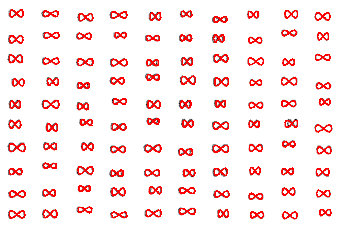

In [12]:
test_dataset = DonutDataset(length = 100)

DonutDataset.displayCanvas('testsetfit-points.png',test_dataset, model = model)


In [13]:
val_dataset = DonutDataset(length = 64)
loader_val = data.DataLoader(
    dataset, 
    batch_size=mini_batch,
    sampler=RandomSampler(data_source=val_dataset),
    num_workers=4)


max min x tensor(30.2841) tensor(1.6897)
max min y tensor(27.9952) tensor(3.2943)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([1000, 2])


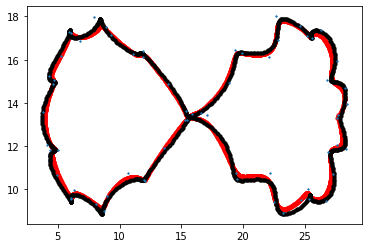

In [14]:
from scipy.interpolate import splprep, splev
from numpy import arange, cos, linspace, pi, sin, random

#display fits on validation set
xgt = None
ygt = None

out = None


for xin,yin in loader_val:
  out = model(xin.cuda(),yin[:,:,:2].cuda())
  xgt = yin[:,:,0]
  ygt = yin[:,:,1]
out = out[1,:,:]
xpred = out[:,0].detach()
ypred = out[:,1].detach()
print(out.shape)
xgt=xgt[1,:]
ygt=ygt[1,:]

t=np.linspace(0,1,1000)
z = t

# spline parameters
s=55 # smoothness parameter
k=3 # spline order
nest=-1 # estimate of number of knots needed (-1 = maximal)

# find the knot points
tck,u = splprep([xpred.cpu().numpy(),ypred.cpu().numpy(),z],s=s,k=k,nest=-1)

# evaluate spline, including interpolated points
xnew,ynew,znew = splev(linspace(0,1,4000),tck)

ascatter = plt.scatter(xnew,ynew,s=10,c='red')
ascatter = plt.scatter(xgt.cpu().numpy(),ygt.cpu().numpy(),s=10,c='black')
ascatter = plt.scatter(tck[1][0],tck[1][1],s=1)
plt.gca().add_artist(ascatter)
